In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
hd = pd.read_feather("merged.feather")

In [7]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565817 entries, 0 to 246021
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      565817 non-null  bool    
 1   BMI               565817 non-null  float64 
 2   Smoking           565817 non-null  bool    
 3   AlcoholDrinking   565817 non-null  bool    
 4   Stroke            565817 non-null  bool    
 5   PhysicalHealth    565817 non-null  float64 
 6   MentalHealth      565817 non-null  float64 
 7   DiffWalking       565817 non-null  bool    
 8   Sex               565817 non-null  category
 9   AgeCategory       565817 non-null  category
 10  Race              565817 non-null  category
 11  Diabetic          565817 non-null  category
 12  PhysicalActivity  565817 non-null  bool    
 13  GenHealth         565817 non-null  int64   
 14  SleepTime         565817 non-null  float64 
 15  Asthma            565817 non-null  bool    
 16  KidneyD

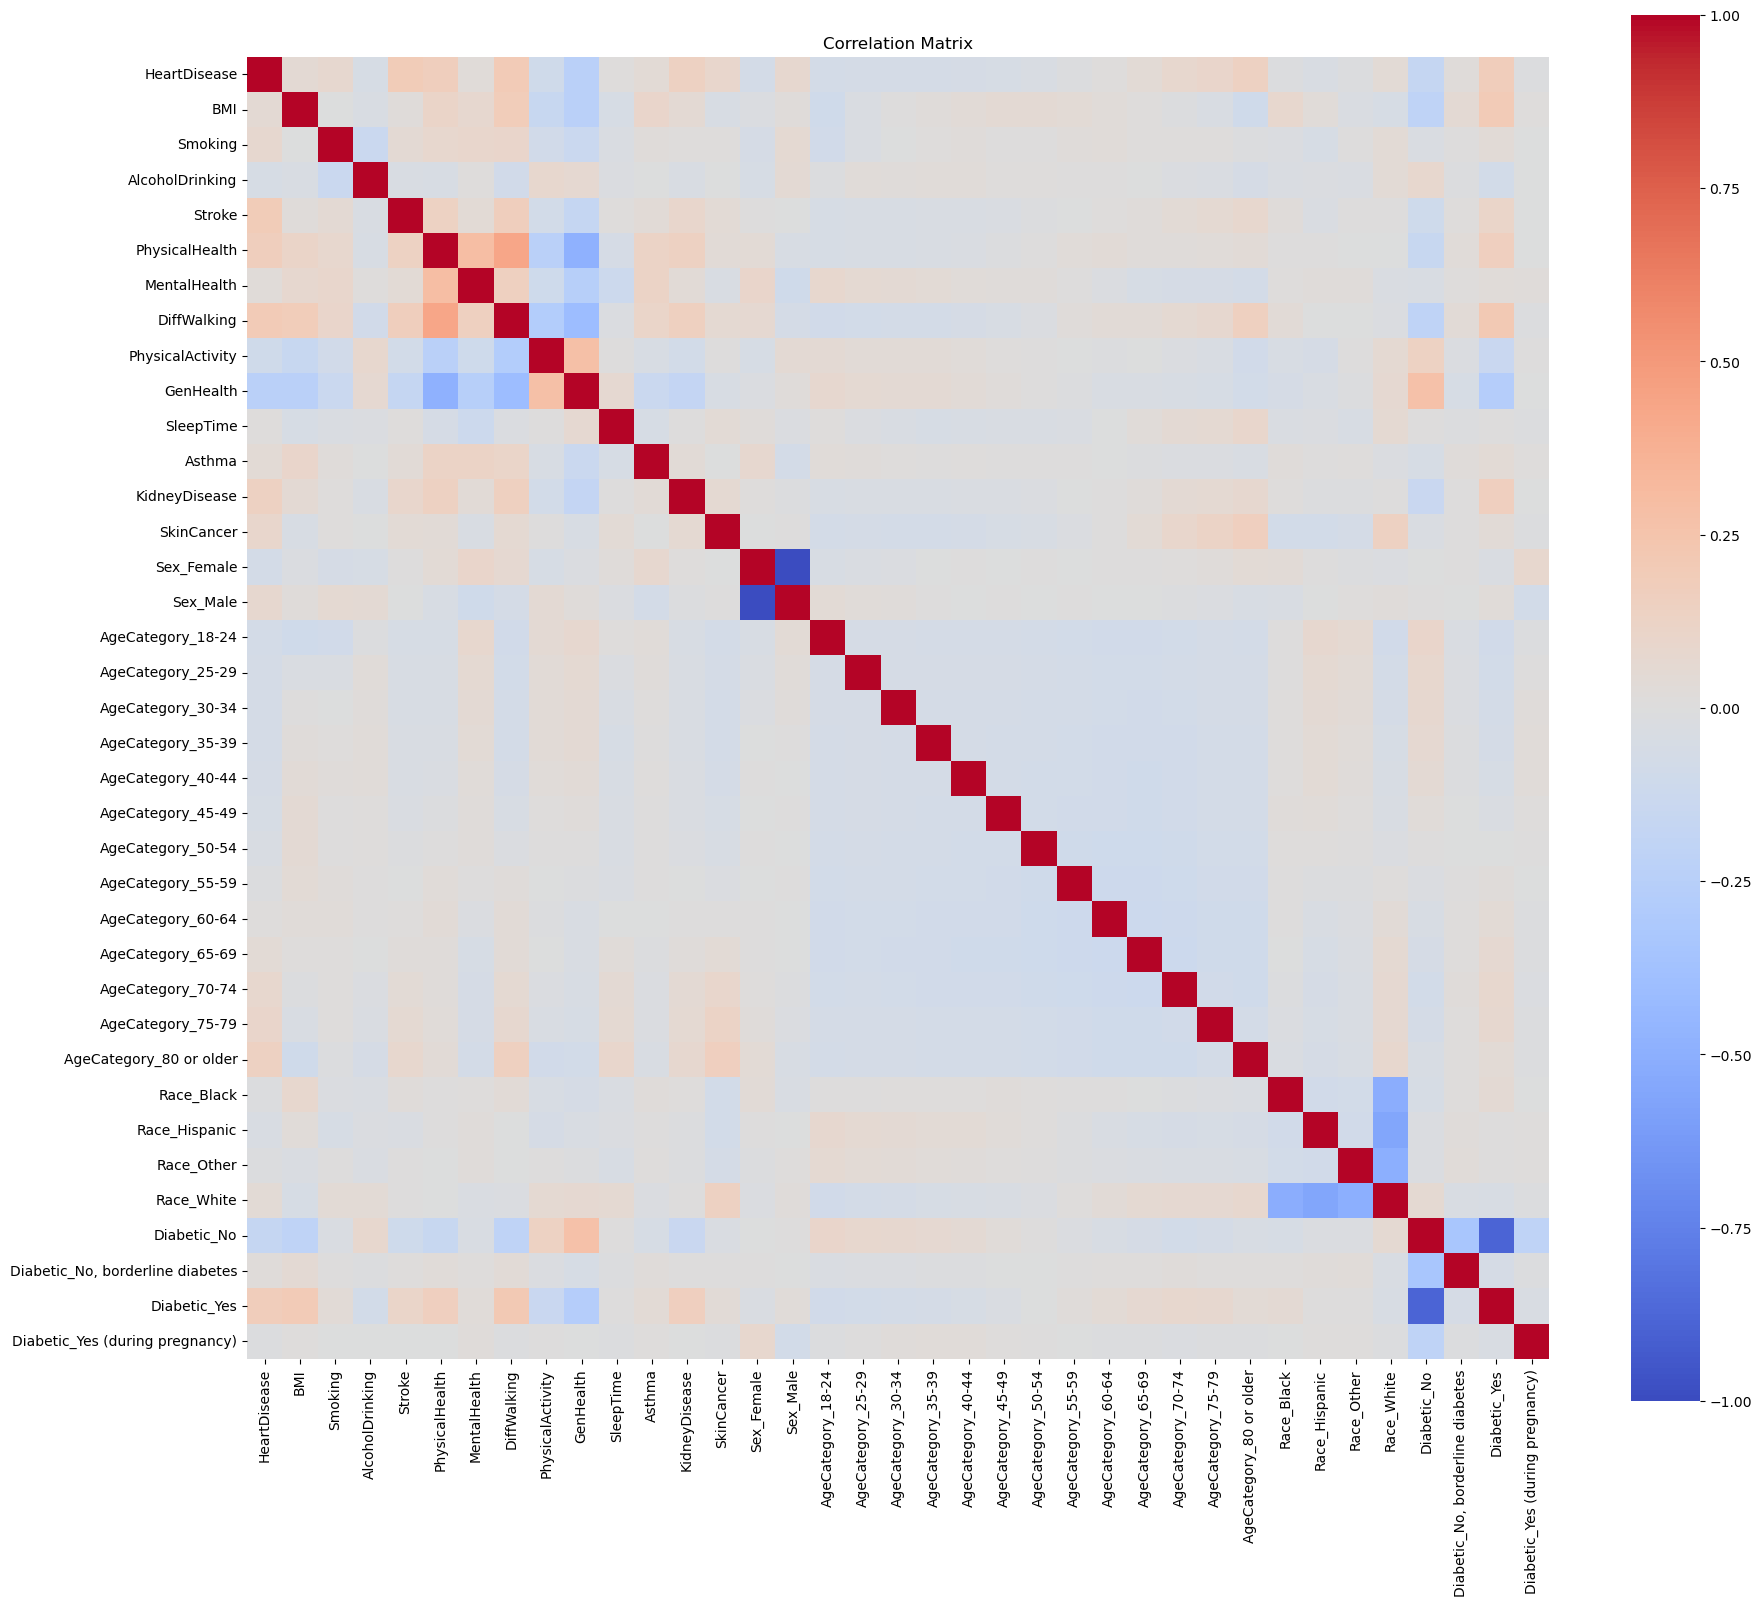

In [8]:
correlation_matrix = pd.get_dummies(hd).corr()

plt.figure(figsize=(21, 18))
sns.heatmap(
    correlation_matrix,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, mean_absolute_percentage_error, classification_report

mse = mean_squared_error
mape = mean_absolute_percentage_error
r2 = r2_score

In [10]:
X = pd.get_dummies(hd.drop("HeartDisease", axis=1))
y = hd["HeartDisease"].astype(int)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565817 entries, 0 to 246021
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   BMI               565817 non-null  float64 
 1   Smoking           565817 non-null  bool    
 2   AlcoholDrinking   565817 non-null  bool    
 3   Stroke            565817 non-null  bool    
 4   PhysicalHealth    565817 non-null  float64 
 5   MentalHealth      565817 non-null  float64 
 6   DiffWalking       565817 non-null  bool    
 7   Sex               565817 non-null  category
 8   AgeCategory       565817 non-null  category
 9   Race              565817 non-null  category
 10  Diabetic          565817 non-null  category
 11  PhysicalActivity  565817 non-null  bool    
 12  GenHealth         565817 non-null  int64   
 13  SleepTime         565817 non-null  float64 
 14  Asthma            565817 non-null  bool    
 15  KidneyDisease     565817 non-null  bool    
 16  SkinCan

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [12]:
cm

array([[102561,    862],
       [  8683,   1058]])

In [13]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.921946,0.991665,0.955536,103423.000000
1,0.551042,0.108613,0.181460,9741.000000
accuracy,0.915653,0.915653,0.915653,0.915653
macro avg,0.736494,0.550139,0.568498,113164.000000
weighted avg,0.890019,0.915653,0.888904,113164.000000


In [14]:
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=10,
#     min_samples_split=5,
#     min_samples_leaf=2,
#     n_jobs=-1,
# )
# rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print()
# print("Random Forest")
# print("MSE: {:.4f}".format(mse))
# print("R^2: {:.4f}".format(r2))

In [15]:
# from sklearn.svm import SVC
# from sklearn.svm import LinearSVC

# svm_classifier = LinearSVC(dual=False)
# svm_classifier.fit(X_train, y_train)
# y_pred = svm_classifier.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print()
# print("SVC Linear")
# print("MSE: {:.4f}".format(mse))
# print("R^2: {:.4f}".format(r2))

In [16]:
# svm_classifier = SVC(
#     kernel='rbf',
# )
# svm_classifier.fit(X_train, y_train)
# y_pred = svm_classifier.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print()
# print("SVC RBF")
# print("MSE: {:.4f}".format(mse))
# print("R^2: {:.4f}".format(r2))

In [17]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(
#     hidden_layer_sizes=(100, 50),  
#     activation='relu',             
#     solver='adam',                 
#     max_iter=1000,
#     learning_rate_init=0.001,     
#     batch_size=32,                
#     early_stopping=True,          
#     validation_fraction=0.1,
# )
# mlp.fit(X_train, y_train)
# y_pred = mlp.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

In [18]:
# print()
# print("MLP")
# print("MSE: {:.4f}".format(mse))
# print("R^2: {:.4f}".format(r2))

In [53]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X = hd.drop("HeartDisease", axis=1)
bool_columns = X.select_dtypes(include=['bool']).columns.tolist()
X[bool_columns] = X[bool_columns].astype(int)

X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X), y, test_size=0.2)

numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)

sampler = RandomUnderSampler(sampling_strategy=1.0)

# Random Forest with Pipeline

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
)


rf_pipe = Pipeline([
    ("preprocessor", preprocessor), 
    ("undersample", sampler),
    ("classifier", rf_model)
])

In [55]:
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)

In [60]:
print(confusion_matrix(y_test, y_pred))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

[[75677 27564]
 [ 3232  6691]]


,precision,recall,f1-score,support
0,0.959041,0.733013,0.830931,103241.000000
1,0.195329,0.674292,0.302911,9923.000000
accuracy,0.727864,0.727864,0.727864,0.727864
macro avg,0.577185,0.703653,0.566921,113164.000000
weighted avg,0.892074,0.727864,0.784630,113164.000000


In [61]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='relu',             
    solver='adam',                 
    max_iter=1000,
    learning_rate_init=0.001,     
    batch_size=32,                
    early_stopping=True,          
    validation_fraction=0.1,
)

mlp_pipe = Pipeline([
    ("preprocessor", preprocessor), 
    ("undersample", sampler),
    ("classifier", mlp)
])

In [62]:
mlp_pipe.fit(X_train, y_train)
y_pred = mlp_pipe.predict(X_test)

In [63]:
print(confusion_matrix(y_test, y_pred))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

[[73825 29416]
 [ 2981  6942]]


,precision,recall,f1-score,support
0,0.961188,0.715074,0.820064,103241.000000
1,0.190935,0.699587,0.299994,9923.000000
accuracy,0.713716,0.713716,0.713716,0.713716
macro avg,0.576061,0.707331,0.560029,113164.000000
weighted avg,0.893647,0.713716,0.774460,113164.000000
